In [153]:
suppressMessages({library(Seurat)
                  library(Matrix)
                  library(dplyr)
                  library(ggplot2)
                  library(data.table)
                 library(stringr)
                 library(tibble)
                 library(tidyr)
                 library(data.table)
                 library(scales)})

### Add Sample Information
1. all.cells.annotation.txt
2. nCoV_mine_integrated_celltype_final_marker.rds (size 3.2GB) --> This will be sent to an email over cloud. 

In [32]:
nCoV.integrated <- readRDS(file = 'nCoV_mine_integrated_celltype_final_marker.rds') #from covid_project.ipynb
to_be_deleted <- c('ID','sample','sample_new', 'group', 'disease', 'hasnCoV', 'cluster','celltype')
nCoV.integrated@meta.data <- nCoV.integrated@meta.data[, !(colnames(nCoV.integrated@meta.data) %in% to_be_deleted)]

In [33]:
annotated_df <- read.table('covid_balf/singlecellstudy/data/all.cell.annotation.meta.txt',
                          header = TRUE)
annotated_df <- annotated_df %>%
    dplyr::filter(sample != 'GSM3660650')

In [34]:
head(annotated_df)

,ID,sample,sample_new,group,disease,hasnCoV,cluster,celltype
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,AAACCTGAGACACTAA_1,C51,HC1,HC,N,N,3,Macrophages
2,AAACCTGAGGAGTACC_1,C51,HC1,HC,N,N,3,Macrophages
3,AAACCTGAGGATATAC_1,C51,HC1,HC,N,N,3,Macrophages
4,AAACCTGAGGTCATCT_1,C51,HC1,HC,N,N,3,Macrophages
5,AAACCTGCACGGATAG_1,C51,HC1,HC,N,N,5,Macrophages
6,AAACCTGCAGGGAGAG_1,C51,HC1,HC,N,N,2,Macrophages


In [35]:
head(nCoV.integrated@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,integrated_snn_res.1.2,seurat_clusters
,<chr>,<dbl>,<int>,<dbl>,<fct>,<fct>
AAACCTGAGACACTAA-1_1,C51,5228,1635,1.549350,2,2
AAACCTGAGGAGTACC-1_1,C51,5071,1385,1.794518,12,12
AAACCTGAGGATATAC-1_1,C51,5531,1729,1.627192,2,2
AAACCTGAGGTCATCT-1_1,C51,5630,1639,1.953819,2,2
AAACCTGCACGGATAG-1_1,C51,7358,1722,2.772493,6,6
AAACCTGCAGGGAGAG-1_1,C51,4615,1312,1.473456,2,2


### Patient meta-data and available integrated dataframe have been compared against each other using various EDA methods

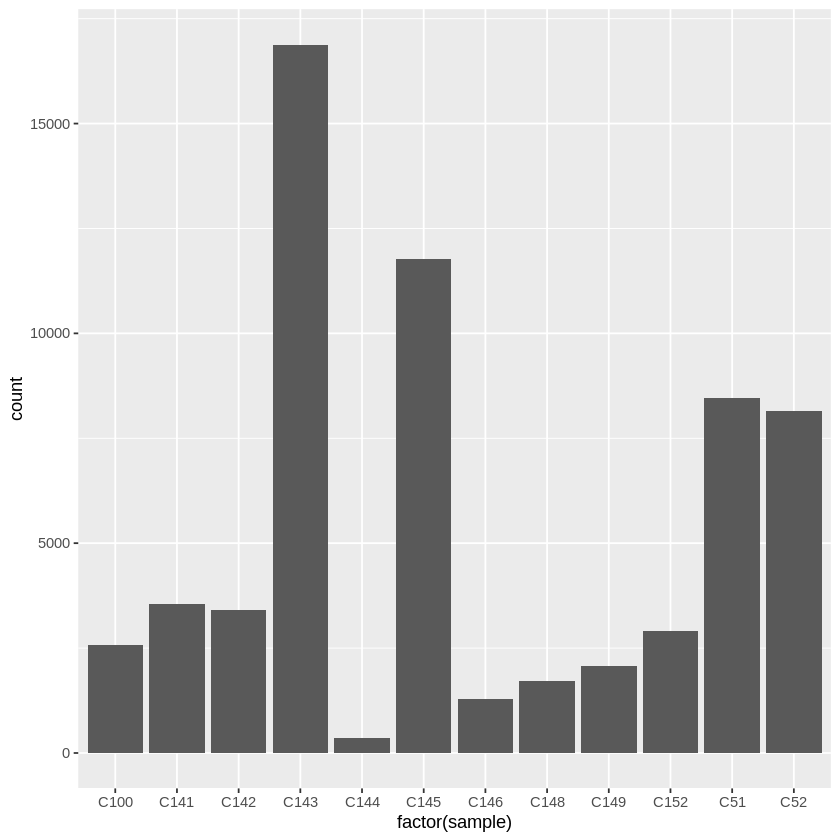

In [36]:
p <- ggplot(annotated_df)
p + aes(factor(sample)) + geom_bar()

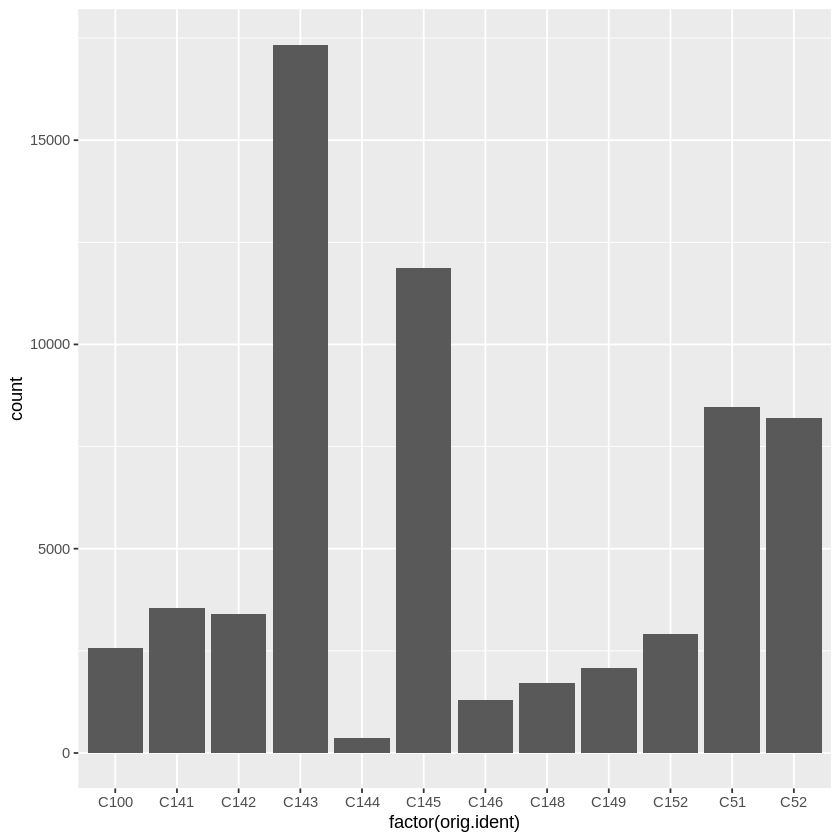

In [37]:
p <- ggplot(nCoV.integrated@meta.data)
p + aes(factor(orig.ident)) + geom_bar()

In [38]:
c(str(annotated_df), str(nCoV.integrated@meta.data))

'data.frame':	63103 obs. of  8 variables:
 $ ID        : chr  "AAACCTGAGACACTAA_1" "AAACCTGAGGAGTACC_1" "AAACCTGAGGATATAC_1" "AAACCTGAGGTCATCT_1" ...
 $ sample    : chr  "C51" "C51" "C51" "C51" ...
 $ sample_new: chr  "HC1" "HC1" "HC1" "HC1" ...
 $ group     : chr  "HC" "HC" "HC" "HC" ...
 $ disease   : chr  "N" "N" "N" "N" ...
 $ hasnCoV   : chr  "N" "N" "N" "N" ...
 $ cluster   : int  3 3 3 3 5 2 8 5 5 5 ...
 $ celltype  : chr  "Macrophages" "Macrophages" "Macrophages" "Macrophages" ...
'data.frame':	63734 obs. of  6 variables:
 $ orig.ident            : chr  "C51" "C51" "C51" "C51" ...
 $ nCount_RNA            : num  5228 5071 5531 5630 7358 ...
 $ nFeature_RNA          : int  1635 1385 1729 1639 1722 1312 1307 2211 1859 1835 ...
 $ percent.mito          : num  1.55 1.79 1.63 1.95 2.77 ...
 $ integrated_snn_res.1.2: Factor w/ 30 levels "0","1","10","11",..: 13 5 13 13 27 13 25 6 6 6 ...
 $ seurat_clusters       : Factor w/ 30 levels "0","1","2","3",..: 3 13 3 3 7 3 5 14 14 14 ...


NULL

> 63103 cells have been annotated, but 63734 cells exist ready to be analyzed.
>
> Barcode distributions for both graphs seem really similar. 

### Can we compensate the differences??

In [39]:
####add  sample info
sample_info = as.data.frame(colnames(nCoV.integrated))
colnames(sample_info) = c('ID')
rownames(sample_info) = sample_info$ID
sample_info$sample = nCoV.integrated@meta.data$orig.ident
rownames(sample_info) <- sample_info$ID
sample_info$ID <- NULL

In [40]:
tail(annotated_df)
tail(sample_info)

,ID,sample,sample_new,group,disease,hasnCoV,cluster,celltype
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
63098,TTTGGTTTCAAACCAC_13,C152,S6,S,Y,N,13,Epithelial
63099,TTTGGTTTCGCTTGTC_13,C152,S6,S,Y,N,1,Macrophages
63100,TTTGTCAAGAAACGCC_13,C152,S6,S,Y,N,14,T
63101,TTTGTCACAACACCCG_13,C152,S6,S,Y,N,19,Plasma
63102,TTTGTCAGTCTGCAAT_13,C152,S6,S,Y,N,19,Plasma
63103,TTTGTCAGTGTTGGGA_13,C152,S6,S,Y,N,10,Macrophages


,sample
,<chr>
TTTGGTTTCAAACCAC-1_12,C152
TTTGGTTTCGCTTGTC-1_12,C152
TTTGTCAAGAAACGCC-1_12,C152
TTTGTCACAACACCCG-1_12,C152
TTTGTCAGTCTGCAAT-1_12,C152
TTTGTCAGTGTTGGGA-1_12,C152


### Barcode names change to match that of analysis-ready data

In [41]:
modify_names <- function(l){
    paste0(strsplit(l, split = '_')[[1]][1],
           '-1_',
         strsplit(l, split = '_')[[1]][2])
} 
annotated_df$ID <- as.character(lapply(annotated_df$ID,modify_names))
rownames(annotated_df) = annotated_df$ID
annotated_df$ID <- NULL

>   Use semi_join function to match up the dimensions

In [42]:
sample_info <- dplyr::semi_join(annotated_df, sample_info)

Joining, by = "sample"



In [43]:
str(sample_info)

'data.frame':	63103 obs. of  7 variables:
 $ sample    : chr  "C51" "C51" "C51" "C51" ...
 $ sample_new: chr  "HC1" "HC1" "HC1" "HC1" ...
 $ group     : chr  "HC" "HC" "HC" "HC" ...
 $ disease   : chr  "N" "N" "N" "N" ...
 $ hasnCoV   : chr  "N" "N" "N" "N" ...
 $ cluster   : int  3 3 3 3 5 2 8 5 5 5 ...
 $ celltype  : chr  "Macrophages" "Macrophages" "Macrophages" "Macrophages" ...


In [44]:
sample_info

,sample,sample_new,group,disease,hasnCoV,cluster,celltype
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
AAACCTGAGACACTAA-1_1,C51,HC1,HC,N,N,3,Macrophages
AAACCTGAGGAGTACC-1_1,C51,HC1,HC,N,N,3,Macrophages
AAACCTGAGGATATAC-1_1,C51,HC1,HC,N,N,3,Macrophages
AAACCTGAGGTCATCT-1_1,C51,HC1,HC,N,N,3,Macrophages
AAACCTGCACGGATAG-1_1,C51,HC1,HC,N,N,5,Macrophages
AAACCTGCAGGGAGAG-1_1,C51,HC1,HC,N,N,2,Macrophages
AAACCTGGTCTAAACC-1_1,C51,HC1,HC,N,N,8,Macrophages
AAACCTGGTGCACCAC-1_1,C51,HC1,HC,N,N,5,Macrophages
AAACCTGGTTACGCGC-1_1,C51,HC1,HC,N,N,5,Macrophages


In [45]:
sample_info <- sample_info %>%
    dplyr::rename(orig.ident = sample)

In [46]:
bad <- dplyr::left_join(nCoV.integrated@meta.data %>%
                mutate(Symbol = rownames(nCoV.integrated@meta.data)),
                sample_info %>%
                mutate(Symbol = rownames(sample_info)),
                by = 'Symbol')
to_be_deleted <- c('orig.ident.y')
bad <- bad[, !(colnames(bad) %in% to_be_deleted)]
bad <- bad %>%
    dplyr::rename(orig.ident = orig.ident.x)
rownames(bad) <- bad$Symbol
bad$Symbol <- NULL

In [47]:
good <- bad %>% 
    dplyr::filter(!is.na(nCount_RNA))

In [48]:
str(good)

'data.frame':	63734 obs. of  12 variables:
 $ orig.ident            : chr  "C51" "C51" "C51" "C51" ...
 $ nCount_RNA            : num  5228 5071 5531 5630 7358 ...
 $ nFeature_RNA          : int  1635 1385 1729 1639 1722 1312 1307 2211 1859 1835 ...
 $ percent.mito          : num  1.55 1.79 1.63 1.95 2.77 ...
 $ integrated_snn_res.1.2: Factor w/ 30 levels "0","1","10","11",..: 13 5 13 13 27 13 25 6 6 6 ...
 $ seurat_clusters       : Factor w/ 30 levels "0","1","2","3",..: 3 13 3 3 7 3 5 14 14 14 ...
 $ sample_new            : chr  "HC1" "HC1" "HC1" "HC1" ...
 $ group                 : chr  "HC" "HC" "HC" "HC" ...
 $ disease               : chr  "N" "N" "N" "N" ...
 $ hasnCoV               : chr  "N" "N" "N" "N" ...
 $ cluster               : int  3 3 3 3 5 2 8 5 5 5 ...
 $ celltype              : chr  "Macrophages" "Macrophages" "Macrophages" "Macrophages" ...


In [49]:
good

,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,integrated_snn_res.1.2,seurat_clusters,sample_new,group,disease,hasnCoV,cluster,celltype
,<chr>,<dbl>,<int>,<dbl>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
AAACCTGAGACACTAA-1_1,C51,5228,1635,1.5493497,2,2,HC1,HC,N,N,3,Macrophages
AAACCTGAGGAGTACC-1_1,C51,5071,1385,1.7945178,12,12,HC1,HC,N,N,3,Macrophages
AAACCTGAGGATATAC-1_1,C51,5531,1729,1.6271922,2,2,HC1,HC,N,N,3,Macrophages
AAACCTGAGGTCATCT-1_1,C51,5630,1639,1.9538188,2,2,HC1,HC,N,N,3,Macrophages
AAACCTGCACGGATAG-1_1,C51,7358,1722,2.7724925,6,6,HC1,HC,N,N,5,Macrophages
AAACCTGCAGGGAGAG-1_1,C51,4615,1312,1.4734561,2,2,HC1,HC,N,N,2,Macrophages
AAACCTGGTCTAAACC-1_1,C51,4260,1307,2.4647887,4,4,HC1,HC,N,N,8,Macrophages
AAACCTGGTGCACCAC-1_1,C51,10112,2211,1.5031646,13,13,HC1,HC,N,N,5,Macrophages
AAACCTGGTTACGCGC-1_1,C51,6748,1859,1.8079431,13,13,HC1,HC,N,N,5,Macrophages


In [50]:
my_data <- read.table('covid_balf/meta.txt', 
                      sep ="\t", header = TRUE)
sample_identity <- as.data.frame(my_data)
sample_identity <- sample_identity %>%
    rowwise() %>%
    mutate(new = paste(sample, group, sep = '_')) %>%
    dplyr::filter(new != 'GSM3660650_HC')

In [51]:
sample_identity
sample <- c('C51', 'C52', 'C100', 'C141', 'C142', 'C144', 'C145', 'C143', 'C146', 'C148', 'C149', 'C152')
sample_new <- sample_identity$sample_new
group <- sample_identity$group 
disease <- sample_identity$group 
df <- data.frame(sample, sample_new, group, disease)

sample,sample_new,sample_new_old,group,disease,nCoV_mean,nFeature_RNA_low,nFeature_RNA_high,nCount_RNA_threshold,percent.mito,new
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<chr>
C51,HC1,HC1,HC,N,0.000000000,200,6000,1000,10,C51_HC
C52,HC2,HC2,HC,N,0.000000000,200,6000,1000,10,C52_HC
C100,HC3,HC3,HC,N,0.000000000,200,6000,1000,10,C100_HC
C141,M1,O1,M,Y,0.000000000,200,6000,1000,10,C141_M
C142,M2,O2,M,Y,0.000000000,200,6000,1000,10,C142_M
C144,M3,O3,M,Y,0.000000000,200,6000,1000,10,C144_M
C145,S1,S1,S,Y,0.085901131,200,6000,1000,10,C145_S
C143,S2,C1,S,Y,0.007000048,200,6000,1000,10,C143_S
C146,S3,C2,S,Y,0.749939188,200,6000,1000,10,C146_S


In [52]:
good

,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,integrated_snn_res.1.2,seurat_clusters,sample_new,group,disease,hasnCoV,cluster,celltype
,<chr>,<dbl>,<int>,<dbl>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
AAACCTGAGACACTAA-1_1,C51,5228,1635,1.5493497,2,2,HC1,HC,N,N,3,Macrophages
AAACCTGAGGAGTACC-1_1,C51,5071,1385,1.7945178,12,12,HC1,HC,N,N,3,Macrophages
AAACCTGAGGATATAC-1_1,C51,5531,1729,1.6271922,2,2,HC1,HC,N,N,3,Macrophages
AAACCTGAGGTCATCT-1_1,C51,5630,1639,1.9538188,2,2,HC1,HC,N,N,3,Macrophages
AAACCTGCACGGATAG-1_1,C51,7358,1722,2.7724925,6,6,HC1,HC,N,N,5,Macrophages
AAACCTGCAGGGAGAG-1_1,C51,4615,1312,1.4734561,2,2,HC1,HC,N,N,2,Macrophages
AAACCTGGTCTAAACC-1_1,C51,4260,1307,2.4647887,4,4,HC1,HC,N,N,8,Macrophages
AAACCTGGTGCACCAC-1_1,C51,10112,2211,1.5031646,13,13,HC1,HC,N,N,5,Macrophages
AAACCTGGTTACGCGC-1_1,C51,6748,1859,1.8079431,13,13,HC1,HC,N,N,5,Macrophages


In [53]:
good$cluster <- NULL
good$ID <- rownames(good)

In [54]:
good <- good %>%
    dplyr::group_by(orig.ident) %>%
    fill(c('sample_new', 'group', 'disease', 'hasnCoV'),
        .direction = 'downup') %>%
    dplyr::ungroup()

In [56]:
good <- data.frame(good)

In [57]:
rownames(good) <- good$ID

In [29]:
nCoV.integrated@meta.data

orig.ident,nCount_RNA,nFeature_RNA,percent.mito,integrated_snn_res.1.2,seurat_clusters,sample_new,group,disease,hasnCoV,celltype
<chr>,<dbl>,<int>,<dbl>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>
C51,5228,1635,1.5493497,2,2,HC1,HC,N,N,Macrophages
C51,5071,1385,1.7945178,12,12,HC1,HC,N,N,Macrophages
C51,5531,1729,1.6271922,2,2,HC1,HC,N,N,Macrophages
C51,5630,1639,1.9538188,2,2,HC1,HC,N,N,Macrophages
C51,7358,1722,2.7724925,6,6,HC1,HC,N,N,Macrophages
C51,4615,1312,1.4734561,2,2,HC1,HC,N,N,Macrophages
C51,4260,1307,2.4647887,4,4,HC1,HC,N,N,Macrophages
C51,10112,2211,1.5031646,13,13,HC1,HC,N,N,Macrophages
C51,6748,1859,1.8079431,13,13,HC1,HC,N,N,Macrophages


In [62]:
nCoV.integrated <- AddMetaData(object = nCoV.integrated,
                     metadata = good)

In [65]:
nCoV.integrated@meta.data$ID <- NULL

In [77]:
nCoV.integrated@meta.data$celltype <- NULL

In [63]:
dpi <- 300
png(file="nCoV-umap-group-sample.png", width = dpi*8, height = dpi*6, units = "px",res = dpi,type='cairo')
DimPlot(object = nCoV.integrated, reduction = 'umap',label = FALSE, group.by = 'sample_new')
dev.off()

png(file="nCoV-umap-split-sample.png", width = dpi*16, height = dpi*16, units = "px",res = dpi,type='cairo')
DimPlot(object = nCoV.integrated, reduction = 'umap',label = TRUE, split.by = 'sample_new', ncol = 4)
dev.off()

png(file="nCoV-umap-group-group.png", width = dpi*8, height = dpi*6, units = "px",res = dpi,type='cairo')
DimPlot(object = nCoV.integrated, reduction = 'umap',label = FALSE, group.by = 'group')
dev.off()

png(file="nCoV-umap-split-group.png", width = dpi*12, height = dpi*4, units = "px",res = dpi,type='cairo')
DimPlot(object = nCoV.integrated, reduction = 'umap',label = TRUE, split.by = 'group', ncol = 3)
dev.off()
#
png(file="nCoV-umap-group-disease.png", width = dpi*8, height = dpi*6, units = "px",res = dpi,type='cairo')
DimPlot(object = nCoV.integrated, reduction = 'umap',label = FALSE, group.by = 'disease')
dev.off()
#
png(file="nCoV-umap-split-disease.png", width = dpi*10, height = dpi*4.5, units = "px",res = dpi,type='cairo')
DimPlot(object = nCoV.integrated, reduction = 'umap',label = TRUE, split.by = 'disease', ncol = 2)
dev.off()

png 
  2

Warning message:
“Removed 29 rows containing missing values (geom_text).”


png 
  2

png 
  2

Warning message:
“Removed 29 rows containing missing values (geom_text).”


png 
  2

png 
  2

Warning message:
“Removed 29 rows containing missing values (geom_text).”


png 
  2

### After integration and sample annotation, we do the EDAs on the distinct cluster

In [ ]:
nCoV.integrated$disease

In [284]:
dpi <- 300
pt <- table(nCoV.integrated$seurat_clusters, nCoV.integrated$disease)
pt <- as.data.frame(pt)
pt$Var1 <- as.character(pt$Var1)

png(file="proportion_disease.png", width = dpi*7, height = dpi*5, units = "px",res = dpi,type='cairo')
ggplot(pt, aes(x = Var2, y = Freq, fill = Var1)) +
  theme_bw(base_size = 15) +
  geom_col(position = "fill", width = 0.5) +
  xlab("Disease") +
  ylab("Proportion") +
  scale_colour_brewer() +
  theme(legend.title = element_blank())
dev.off()

png 
  2

In [225]:
cluster12 <- subset(x = nCoV.integrated, subset = seurat_clusters == 12)
cluster.averages <- AverageExpression(cluster12,
                                     return.seurat = TRUE,
                                     group.by = 'sample_new')
sample_new <- unique(cluster12@meta.data[['sample_new']])
#
levels(cluster.averages)
#
Idents(cluster.averages) <- unlist(sample_new)
#
unlist(as.character(Idents(cluster.averages)))
#
dpi <- 300
png(file="cluster12_integrated_top.png", width = dpi*10, height = dpi*10, units = "px",res = dpi,type='cairo')
DoHeatmap(cluster.averages, 
         features = unlist(TopFeatures(cluster12[['pca']],
                          balanced = FALSE)),
          size =3, draw.lines = TRUE,
         group.by = 'ident',
         label = FALSE)
dev.off()

feature_points <- TopFeatures(cluster12[['pca']])
#
dpi <- 300
png(file="cluster12_integrated_heatmap_variable.png", width = dpi*10, height = dpi*10, units = "px",res = dpi,type='cairo')
DoHeatmap(cluster.averages, features = feature_points, raster=F,
         label= FALSE) + scale_fill_gradientn(colors = rev(RColorBrewer::brewer.pal(n = 10, name = "RdBu")) ) + guides(color=FALSE)
dev.off()

top10 <- head(VariableFeatures(cluster12), 10)

options(ggrepel.max.overlaps = Inf)

dpi <- 300
plot1 <- VariableFeaturePlot(cluster12) 
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE,
                    xnudge = 0, ynudge = 0, xmax = Inf) 
png(file="cluster12_integrated.png", width = dpi*10, height = dpi*15, units = "px",res = dpi,type='cairo')
plot1/plot2
dev.off()

Removing cells with NA for 1 or more grouping variables

Warning message:
“The following arguments are not used: row.names”
Centering and scaling data matrix



[1] "Average"

[1] "HC1" "HC2" "HC3" NA    "M1"  "M2"  "M3"  "S2"  "S1"  "S3"  "S4"

Warning message:
“Removed 40 rows containing missing values (geom_point).”


png 
  2

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
“Removed 40 rows containing missing values (geom_point).”


png 
  2

Warning message:
“Ignoring unknown parameters: xmax”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


png 
  2

In [226]:
mypalette <- RColorBrewer::brewer.pal(n = 40, name = "RdBu")
features <- TopFeatures(cluster12[['pca']])
png(file="cluster12_dotplot.png", width = dpi*20, height = dpi*5, units = "px",res = dpi,type='cairo')
DotPlot(cluster12, features = features, cols = mypalette, dot.scale = 9, col.max = 40, split.by = 'group') + 
       RotatedAxis()
dev.off()

Warning message in RColorBrewer::brewer.pal(n = 40, name = "RdBu"):
“n too large, allowed maximum for palette RdBu is 11
Returning the palette you asked for with that many colors
”


png 
  2

In [228]:
cluster0 <- subset(x = nCoV.integrated, subset = seurat_clusters == 0)
cluster.averages <- AverageExpression(cluster0,
                                     return.seurat = TRUE,
                                     group.by = 'sample_new')
sample_new <- unique(cluster0@meta.data[['sample_new']])
#
Idents(cluster.averages) <- unlist(sample_new)
#
dpi <- 300
png(file="cluster0_integrated_top.png", width = dpi*10, height = dpi*10, units = "px",res = dpi,type='cairo')
DoHeatmap(cluster.averages, 
         features = unlist(TopFeatures(cluster0[['pca']],
                          balanced = FALSE)),
          size =3, draw.lines = TRUE,
         group.by = 'ident',
         label = FALSE)
dev.off()

feature_points <- TopFeatures(cluster0[['pca']])
#
dpi <- 300
png(file="cluster0_integrated_heatmap_variable.png", width = dpi*10, height = dpi*10, units = "px",res = dpi,type='cairo')
DoHeatmap(cluster.averages, features = feature_points, raster=F,
         label= FALSE) + scale_fill_gradientn(colors = rev(RColorBrewer::brewer.pal(n = 10, name = "RdBu")) ) + guides(color=FALSE)
dev.off()

top10 <- head(VariableFeatures(cluster0), 10)

options(ggrepel.max.overlaps = Inf)

dpi <- 300
plot1 <- VariableFeaturePlot(cluster0) 
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE,
                    xnudge = 0, ynudge = 0, xmax = Inf) 
png(file="cluster0_integrated.png", width = dpi*10, height = dpi*15, units = "px",res = dpi,type='cairo')
plot1/plot2
dev.off()

Removing cells with NA for 1 or more grouping variables

Warning message:
“The following arguments are not used: row.names”
Centering and scaling data matrix



[1] "Average"

[1] "HC1" "HC2" "HC3" NA    "M1"  "M2"  "M3"  "S2"  "S1"  "S3"  "S4"

Warning message:
“Removed 40 rows containing missing values (geom_point).”


png 
  2

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
“Removed 40 rows containing missing values (geom_point).”


png 
  2

Warning message:
“Ignoring unknown parameters: xmax”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


png 
  2

Warning message in RColorBrewer::brewer.pal(n = 40, name = "RdBu"):
“n too large, allowed maximum for palette RdBu is 11
Returning the palette you asked for with that many colors
”


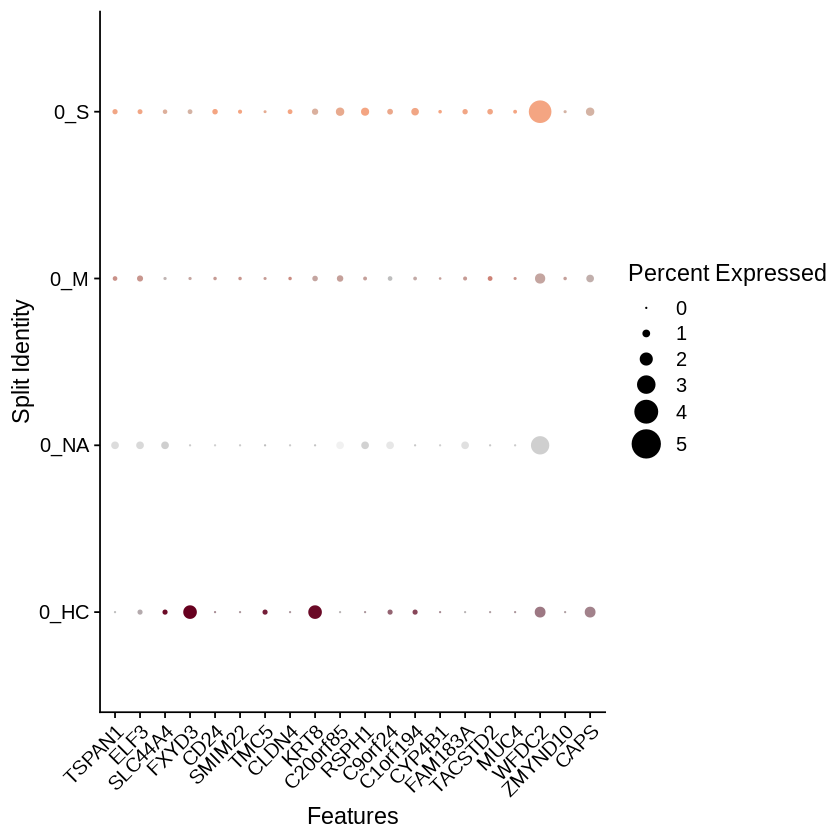

In [285]:
mypalette <- RColorBrewer::brewer.pal(n = 40, name = "RdBu")
features <- TopFeatures(cluster0[['pca']])
#png(file="cluster0_dotplot.png", width = dpi*20, height = dpi*5, units = "px",res = dpi,type='cairo')
DotPlot(cluster0, features = features, cols = mypalette, dot.scale = 9, col.max = 40, split.by = 'group') + 
       RotatedAxis()
#dev.off()

In [230]:
cluster2 <- subset(x = nCoV.integrated, subset = seurat_clusters == 2)

In [286]:
mypalette <- RColorBrewer::brewer.pal(n = 40, name = "RdBu")
features <- TopFeatures(cluster2[['pca']])
png(file="cluster2_dotplot.png", width = dpi*20, height = dpi*5, units = "px",res = dpi,type='cairo')
DotPlot(cluster2, features = features, cols = mypalette, dot.scale = 9, col.max = 40, split.by = 'group') + 
       RotatedAxis()
dev.off()

Warning message in RColorBrewer::brewer.pal(n = 40, name = "RdBu"):
“n too large, allowed maximum for palette RdBu is 11
Returning the palette you asked for with that many colors
”


png 
  2

In [244]:
DoHeatmap(cluster.averages, 
         features = unlist(TopFeatures(cluster0[['pca']],
                          balanced = FALSE)),
          size =3, draw.lines = TRUE,
         group.by = 'ident',
         label = FALSE)

In [278]:
#
cluster0 <- subset(x = nCoV.integrated, subset = seurat_clusters == 0)
cluster.averages <- AverageExpression(cluster0,
                                     return.seurat = TRUE,
                                     group.by = 'sample_new')

sample_new <- unique(cluster0@meta.data[['sample_new']])
Idents(cluster.averages) <- unlist(sample_new)

features <- c('MARCO', 'CD68', 'FCGR3A', 'TREM2', 'FCN1', 'SPP1', 'FABP4', 'CD8A')
dpi <- 300
options(ggrepel.max.overlaps = Inf)
plot1 <- VariableFeaturePlot(cluster0) 
plot2 <- LabelPoints(plot = plot1, points = features, repel = TRUE,
                    xnudge = 0, ynudge = 0) 
png(file="cluster0_integrated_curated.png", width = dpi*10, height = dpi*15, units = "px",res = dpi,type='cairo')
plot1/plot2
dev.off()

Removing cells with NA for 1 or more grouping variables

Warning message:
“The following arguments are not used: row.names”
Centering and scaling data matrix

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


png 
  2

In [281]:
mypalette <- RColorBrewer::brewer.pal(n = 11, name = "RdBu")
features <- c('MARCO', 'CD68', 'FCGR3A', 'TREM2', 'FCN1', 'SPP1', 'FABP4','CD8A')
png(file="cluster0_integrated_curated_dotplot.png", width = dpi*10, height = dpi*15, units = "px",res = dpi,type='cairo')
DotPlot(cluster0, features = features, cols = mypalette, dot.scale = 9, col.max = 40, split.by = 'group') + 
       RotatedAxis()
dev.off()

png 
  2

In [282]:
#
cluster2 <- subset(x = nCoV.integrated, subset = seurat_clusters == 2)
cluster.averages <- AverageExpression(cluster2,
                                     return.seurat = TRUE,
                                     group.by = 'sample_new')

sample_new <- unique(cluster2@meta.data[['sample_new']])
Idents(cluster.averages) <- unlist(sample_new)

features <- c('MARCO', 'CD68', 'FCGR3A', 'TREM2', 'FCN1', 'SPP1', 'FABP4', 'CD8A')
dpi <- 300
options(ggrepel.max.overlaps = Inf)
plot1 <- VariableFeaturePlot(cluster2) 
plot2 <- LabelPoints(plot = plot1, points = features, repel = TRUE,
                    xnudge = 0, ynudge = 0) 
png(file="cluster2_integrated_curated.png", width = dpi*10, height = dpi*15, units = "px",res = dpi,type='cairo')
plot1/plot2
dev.off()
mypalette <- RColorBrewer::brewer.pal(n = 11, name = "RdBu")
png(file="cluster2_integrated_curated_dotplot.png", width = dpi*10, height = dpi*15, units = "px",res = dpi,type='cairo')
DotPlot(cluster2, features = features, cols = mypalette, dot.scale = 9, col.max = 40, split.by = 'group') + 
       RotatedAxis()
dev.off()

Removing cells with NA for 1 or more grouping variables

Warning message:
“The following arguments are not used: row.names”
Centering and scaling data matrix

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


png 
  2

png 
  2

In [283]:
#
cluster12 <- subset(x = nCoV.integrated, subset = seurat_clusters == 12)
cluster.averages <- AverageExpression(cluster12,
                                     return.seurat = TRUE,
                                     group.by = 'sample_new')

sample_new <- unique(cluster12@meta.data[['sample_new']])
Idents(cluster.averages) <- unlist(sample_new)

features <- c('MARCO', 'CD68', 'FCGR3A', 'TREM2', 'FCN1', 'SPP1', 'FABP4', 'CD8A')

dpi <- 300
options(ggrepel.max.overlaps = Inf)
plot1 <- VariableFeaturePlot(cluster12) 
plot2 <- LabelPoints(plot = plot1, points = features, repel = TRUE,
                    xnudge = 0, ynudge = 0) 
png(file="cluster12_integrated_curated.png", width = dpi*10, height = dpi*15, units = "px",res = dpi,type='cairo')
plot1/plot2
dev.off()
mypalette <- RColorBrewer::brewer.pal(n = 11, name = "RdBu")
png(file="cluster12_integrated_curated_dotplot.png", width = dpi*10, height = dpi*15, units = "px",res = dpi,type='cairo')
DotPlot(cluster12, features = features, cols = mypalette, dot.scale = 9, col.max = 40, split.by = 'group') + 
       RotatedAxis()
dev.off()

Removing cells with NA for 1 or more grouping variables

Warning message:
“The following arguments are not used: row.names”
Centering and scaling data matrix

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


png 
  2

png 
  2